In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Mounted at /content/drive


# requirements

In [ ]:
!pip install mpl_finance

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import pickle

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# load data

In [ ]:
# interval = '30m'
interval = '1m'

date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

interval6 = '4h'
date_path6 = './candlestick_concated/%s/quant_v2/' % interval6
file_list6 = os.listdir(date_path6)
print((file_list6))

interval7 = '1d'
date_path7 = './candlestick_concated/%s/quant_v2/' % interval7
file_list7 = os.listdir(date_path7)
print((file_list7))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUSD

# basic_func

In [ ]:
def sync_check(df, second_df, third_df, fourth_df, fifth_df, sixth_df=None, seventh_df=None):

    #           supertrend          #
    ha_second_df = heikinashi(second_df)
    # ha_third_df = heikinashi(third_df)
    # print(ha_second_df.tail(10))
    # quit()

    second_df['minor_ST1_Up'], second_df['minor_ST1_Down'], second_df['minor_ST1_Trend'] = supertrend(second_df, 10, 2)
    second_df['minor_ST2_Up'], second_df['minor_ST2_Down'], second_df['minor_ST2_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2)
    second_df['minor_ST3_Up'], second_df['minor_ST3_Down'], second_df['minor_ST3_Trend'] = supertrend(ha_second_df, 7,
                                                                                                      2.5)
    # print(df.head(20))
    # quit()

    # startTime = time.time()

    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [i for i in range(-9, 0, 1)]),
                              columns=['minor_ST1_Up', 'minor_ST1_Down', 'minor_ST1_Trend'
                                  , 'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST2_Trend'
                                  , 'minor_ST3_Up', 'minor_ST3_Down', 'minor_ST3_Trend']))

    # print(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]].tail())
    # min_upper = np.minimum(df["minor_ST1_Up"], df["minor_ST2_Up"], df["minor_ST3_Up"])
    # max_lower = np.maximum(df["minor_ST1_Down"], df["minor_ST2_Down"], df["minor_ST3_Down"])
    min_upper = np.min(df[["minor_ST1_Up", "minor_ST2_Up", "minor_ST3_Up"]], axis=1)
    max_lower = np.max(df[["minor_ST1_Down", "minor_ST2_Down", "minor_ST3_Down"]], axis=1)

    df['middle_line'] = (min_upper + max_lower) / 2

    print("supertrend phase done")


    #           lucid sar              #
    df['sar1'], df['sar1_uptrend'] = lucid_sar(df, return_uptrend=True)

    second_df['sar'], second_df['sar_uptrend'] = lucid_sar(second_df, return_uptrend=True)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['sar2', 'sar2_uptrend']))

    third_df['sar'], third_df['sar_uptrend'] = lucid_sar(third_df, return_uptrend=True)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['sar3', 'sar3_uptrend']))

    fourth_df['sar'], fourth_df['sar_uptrend'] = lucid_sar(fourth_df, return_uptrend=True)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['sar4', 'sar4_uptrend']))

    fifth_df['sar'], fifth_df['sar_uptrend'] = lucid_sar(fifth_df, return_uptrend=True)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['sar5', 'sar5_uptrend']))
    
    if sixth_df is not None:
      sixth_df['sar'], sixth_df['sar_uptrend'] = lucid_sar(sixth_df, return_uptrend=True)
      df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-2, -1]), columns=['sar6', 'sar6_uptrend']))
    
    if seventh_df is not None:
      seventh_df['sar'], seventh_df['sar_uptrend'] = lucid_sar(seventh_df, return_uptrend=True)
      df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-2, -1]), columns=['sar7', 'sar7_uptrend']))

    # print(df[['sar1', 'sar2']].tail(20))
    # print(df[['minor_ST1_Up', 'minor_ST1_Trend']].tail(20))
    # quit()

    print("sar phase done")


    
    #           ichimoku            #
    df['senkou_a1'], df['senkou_b1'] = ichimoku(df)
    
    second_df['senkou_a'], second_df['senkou_b'] = ichimoku(second_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-2, -1]), columns=['senkou_a2', 'senkou_b2']))
    
    third_df['senkou_a'], third_df['senkou_b'] = ichimoku(third_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1]), columns=['senkou_a3', 'senkou_b3']))
    
    fourth_df['senkou_a'], fourth_df['senkou_b'] = ichimoku(fourth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1]), columns=['senkou_a4', 'senkou_b4']))
    
    fifth_df['senkou_a'], fifth_df['senkou_b'] = ichimoku(fifth_df)
    df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-2, -1]), columns=['senkou_a5', 'senkou_b5']))

    if sixth_df is not None:
      sixth_df['senkou_a'], sixth_df['senkou_b'] = ichimoku(sixth_df)
      df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-2, -1]), columns=['senkou_a6', 'senkou_b6']))

    if seventh_df is not None:
      seventh_df['senkou_a'], seventh_df['senkou_b'] = ichimoku(seventh_df)
      df = df.join( pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-2, -1]), columns=['senkou_a7', 'senkou_b7']))


    #           1-2. displacement           #
    cloud_cnt = 0
    for col_n in df.columns:
      if 'senkou' in col_n:
        cloud_cnt += 1
    print(cloud_cnt)

    # df['senkou_a1'] = df['senkou_a1'].shift(26 - 1)
    # df['senkou_b1'] = df['senkou_b1'].shift(26 - 1)
    # # df.iloc[:, -10:] = df.iloc[:, -10:].shift(26 - 1)
    # # df.iloc[:, -14:] = df.iloc[:, -14:].shift(26 - 1)
    df.iloc[:, -cloud_cnt:] = df.iloc[:, -cloud_cnt:].shift(26 - 1)

    print("cloud phase done")

    
    #           macd            #
    df['macd_hist1'] = macd(df)
    
    second_df['macd_hist'] = macd(second_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['macd_hist2']))

    third_df['macd_hist'] = macd(third_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['macd_hist3']))

    fourth_df['macd_hist'] = macd(fourth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['macd_hist4']))

    fifth_df['macd_hist'] = macd(fifth_df)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['macd_hist5']))
    
    if sixth_df is not None:
      sixth_df['macd_hist'] = macd(sixth_df)
      df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-1]), columns=['macd_hist6']))
    
    if seventh_df is not None:
      seventh_df['macd_hist'] = macd(seventh_df)
      df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-1]), columns=['macd_hist7']))


    print("macd phase done")


    #         trix        #
    df['trix1'] = trix_hist(df, 14, 1, 5)
    
    second_df['trix'] = trix_hist(second_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['trix2']))

    third_df['trix'] = trix_hist(third_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['trix3']))

    fourth_df['trix'] = trix_hist(fourth_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['trix4']))

    fifth_df['trix'] = trix_hist(fifth_df, 14, 1, 5)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['trix5']))

    if sixth_df is not None:
      sixth_df['trix'] = trix_hist(sixth_df, 14, 1, 5)
      df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-1]), columns=['trix6']))

    if seventh_df is not None:
      seventh_df['trix'] = trix_hist(seventh_df, 14, 1, 5)
      df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-1]), columns=['trix7']))


    #       stochastic      #
    df['stoch'] = stoch(df, 5, 3, 3)
    print("stochastic phase done")

    #       fisher      #
    df['fisher30'] = fisher(df, 30)
    df['fisher60'] = fisher(df, 60)
    df['fisher120'] = fisher(df, 120)
    print("fisher phase done")

    #       cctbbo      #
    df['cctbbo'], _ = cct_bbo(df, 21, 13)
    print("cctbbo phase done")

    
    #          add for ep           #
    df['min_upper'] = min_upper
    df['max_lower'] = max_lower
  

    return df


# make & save res_df (htf 의 timestamp range 가 1m 을 포함해야함)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue
  
  # if 'btc'.upper() not in file_list[i]:
  #   continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-05-30'.upper() not in file_list[i]:
  # if '2021-06-30'.upper() not in file_list[i]:
  if '2021-08-29'.upper() not in file_list[i]:
  # if '2021-07-03'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
    continue

  

  # if 'eth'.upper() in file_list[i]:
  # # if '2021-07-03'.upper() not in file_list[i]:
  # # if '2021-07-01'.upper() not in file_list[i]:
  #   continue

  for key in keys:  

    excel_name = key.replace(".xlsx", "_sartrend_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    
    df = pd.read_excel(date_path + key, index_col=0).iloc[40:]
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    sixth_df = pd.read_excel(date_path6 + key, index_col=0)
    seventh_df = pd.read_excel(date_path7 + key, index_col=0)

    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])
    print(sixth_df.index[[0, -1]])
    print(seventh_df.index[[0, -1]])

    res_df = sync_check(df, second_df, third_df, fourth_df, fifth_df)
    # res_df = sync_check(df, second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df)

    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

  0%|          | 0/135 [00:00<?, ?it/s]

DatetimeIndex(['2021-07-01 00:40:59.999000', '2021-08-29 09:01:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-07-01 00:02:59.999000', '2021-08-29 09:02:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-07-01 00:04:59.999000', '2021-08-29 09:09:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-07-01 00:14:59.999000', '2021-08-29 09:14:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-07-01 00:29:59.999000', '2021-08-29 09:29:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-29 04:59:59.999000', '2021-08-29 12:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-30 08:59:59.999000', '2021-08-30 08:59:59.999000'], dtype='datetime64[ns]', freq=None)
backing_i : -2
supertrend phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
sar phase done
backing_i : -2
backing_i : -2
backing_i : -2
backing_i : -2
10
cloud phase done
backing_i : -2
backing_i : -2
b

# load res_df

In [ ]:
save_path = './candlestick_concated/res_df/'

# key = '2021-07-03 ETHUSDT.xlsx'
# key = '2021-07-01 ETHUSDT.xlsx'
key = '2021-07-01 ETHUSDT_backi2.xlsx'
key = '2021-08-29 ETHUSDT_sartrend_backi2.xlsx'

# key = '2021-06-30 ETHUSDT_backi2.xlsx'
# key = '2021-06-30 BTCUSDT_backi2.xlsx'
# key = '2021-06-30 XRPUSDT_backi2.xlsx'
# key = '2021-06-30 ETHUSDT_backi1.xlsx'
res_df = pd.read_excel(save_path + key, index_col=0)

# sync check

In [ ]:
plot_size = 300


#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols



#         do plot       #
plot_df = res_df.iloc[-plot_size:, input_cols]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# fig.show()
# fig.canvas.draw()

temp_ohlc = plot_df.values[:, :4]
index = np.arange(len(temp_ohlc))
candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

# print(plot_df.values[:, 4:])
plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                  where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)



plt.show()
# plt.draw()
plt.close()
# plt.pause(1e-3)

# pr check with strategy

### save sample res_dfs

In [ ]:
save_path = './candlestick_concated/res_df/'
res_df_files = os.listdir(save_path)

print(res_df_files)

res_df_dict = {}

max_cnt = 1
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):
  # if '2021-04-30'.upper() not in key:
  # if '2021-05-30'.upper() not in key:
  # if '2021-06-30'.upper() not in key:
  # if '2021-07-03'.upper() not in key:
  # if '2021-07-01'.upper() not in key:
  if '2021-08-29'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "eth".upper() not in key:
  #   continue

  if "_sartrend_backi2" not in key:
    continue

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  res_df = pd.read_excel(save_path + key, index_col=0)  

  res_df_dict[key] = res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


['2021-07-03 ETHUSDT.xlsx_backup', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT_question.xlsx', '2021-06-30 ETHUSDT_backi1.xlsx', '2021-06-30 ETHUSDT_backi2.xlsx', '2021-07-01 ETHUSDT_backi1.xlsx', '2021-07-01 ETHUSDT_backi2.xlsx', '2021-06-30 BTCUSDT_backi2.xlsx', '2021-06-30 XRPUSDT_backi2.xlsx', '2021-06-30 LINKUSDT_backi2.xlsx', '2021-06-30 ADAUSDT_backi2.xlsx', '2021-06-30 ETCUSDT_backi2.xlsx', '2021-06-30 LTCUSDT_backi2.xlsx', '2021-06-30 EOSUSDT_backi2.xlsx', '2021-06-30 BCHUSDT_backi2.xlsx', '2021-06-30 XLMUSDT_backi2.xlsx', '2021-07-01 BTCUSDT_backi2.xlsx', '2021-07-01 BCHUSDT_backi2.xlsx', '2021-07-01 XRPUSDT_backi2.xlsx', '2021-07-01 EOSUSDT_backi2.xlsx', '2021-07-01 LTCUSDT_backi2.xlsx', '2021-07-01 ETCUSDT_backi2.xlsx', '2021-07-01 LINKUSDT_backi2.xlsx', '2021-07-01 XLMUSDT_backi2.xlsx', '2021-07-01 ADAUSDT_backi2.xlsx', '2021-06-30 ETHUSDTmacd5355_backi2.xlsx', '2021-06-30 BTCUSDTmacd5355_backi2.xlsx', '2021-06-30 BCHUSDTmacd5355_backi2.xlsx', '2021-06-30 XRPUSDTmacd535

## load res_df_dict

In [ ]:
save_path = './candlestick_concated/res_df/'
dict_name = "2021-06-30 ETHUSDT_sartrend_backi2_res_dfs.pkl"
dict_name = "2021-07-01 ETHUSDT_backi2_res_dfs.pkl"
dict_name = "2021-08-29 ETHUSDT_sartrend_backi2_res_dfs.pkl"


#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  res_df_dict = pickle.load(f)

print(dict_name, "loaded !")

2021-08-29 ETHUSDT_sartrend_backi2_res_dfs.pkl loaded !


## basic strategy

In [ ]:
org_res_df = res_df.copy()

### shifting

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### lastest platform

2021-08-29 ETHUSDT_sartrend_backi2.xlsx loaded !
cloud_lookback : 69


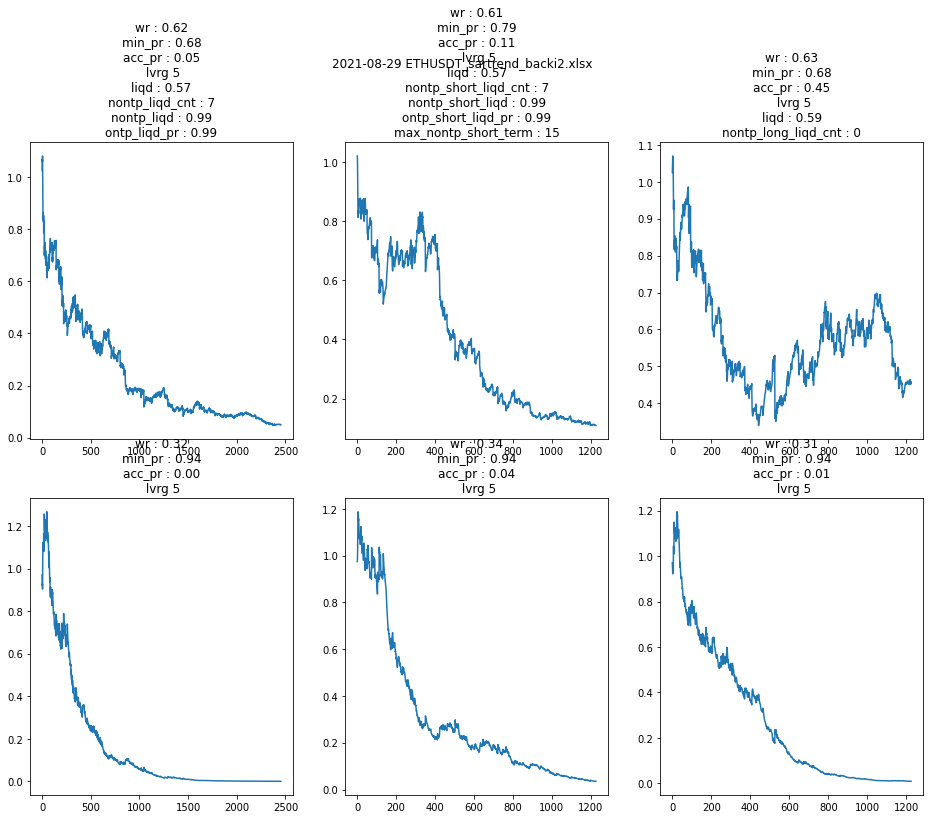

In [ ]:
def min_max_scale(npy_x):
  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

fee = 0.0004
lvrg = 5
# lvrg = 2

# gap = 0.0002
# gap = 0.0001
gap = 0.00005

p_qty_divider = 1.5

# ------- ep set ------- #
entry_type = 'limit'
# entry_type = 'market'

# ep_gap = 0.0005
ep_gap = 0.0002
# ep_gap = 0.0001
# ep_gap = 0.00005

# ------- tp set ------- #
exit_type = 'limit'
# exit_type = 'market'
static_tp = 0

# ------- lvrg set ------- #
static_lvrg = 1
target_pct = 0.04
hl_lookback = 10


# ------- inversion set ------- #
inversion = 0

if inversion:
  short_entry = [1, 2]
  long_entry = [-1, -2]
else:
  short_entry = [-1, -2]
  long_entry = [1, 2]

  
tp_cut_ratio = 0.7

fdist_thresh = 1

# ----------------- indicator ----------------- #
# ------- shift_size ------- #
cloud_shift_size = 1
sma_shift_size = 1
close_shift_size = 1


# ------- lb ------- #
cloud_lookback = 30
cloud_lookback = 69
# cloud_lookback = 150
# cloud_lookback = 10

sma_lookback = 100
# sma_lookback = 100

sar_lookback = 5


# ------- indi. params ------- #
sma = 'sma1'

# sma_period = 250
sma_period = 100

fisher_upper = 1.5
fisher_lower = -1.5

stoch_upper = 63
stoch_lower = 37

cctbbo_upper = 80
cctbbo_lower = 20

senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

for key, res_df in res_df_dict.items():

  print(key, "loaded !")
  # print("res_df.columns :", res_df.columns)  
  # print(res_df.tail(100))
  # break

  # if 'xrp'.upper() in key:
  #   pass
  # else:
  #   continue

  for senkou_a, senkou_b in zip(senkoua_list, senkoub_list): 
  # for sma4_period in range(5, 30, 2):
  # for sma4_period in range(13, 14, 2):
  # for cloud_lookback in np.arange(5, 100, 3):

    # print("sma4_period :", sma4_period)
    print("cloud_lookback :", cloud_lookback)

    # -------------------- additional indicators -------------------- #    
    # senkou_a, senkou_b = 'senkou_a1', 'senkou_b1'
    
    cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)
    cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)

    under_top = res_df['close'].shift(cloud_shift_size) <= cloud_top.shift(cloud_shift_size)
    over_top = res_df['close'].shift(cloud_shift_size) >= cloud_top.shift(cloud_shift_size)

    over_bottom = res_df['close'].shift(cloud_shift_size) >= cloud_bottom.shift(cloud_shift_size)
    under_bottom = res_df['close'].shift(cloud_shift_size) >= cloud_bottom.shift(cloud_shift_size)

      # --------------- 2nd middle --------------- #    
    upper_middle = (res_df['middle_line'] + res_df['min_upper']) / 2
    lower_middle = (res_df['middle_line'] + res_df['max_lower']) / 2
    
      # --------------- sma --------------- #    
    res_df['sma1'] = res_df['close'].rolling(sma_period).mean()  
    # # print(res_df['sma5'].tail())

        # --------------- htf sma --------------- #    
    # fourth_df = pd.read_excel(date_path4 + key.replace("_4h1d_backi2", ""), index_col=0)

    # if "sma4" in res_df.columns:
    #   res_df.drop("sma4", axis=1, inplace=True)

    # fourth_df['sma'] = fourth_df['close'].rolling(sma4_period).mean()
    # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, fourth_df, [-1]), columns=['sma4']))

        
    # --------------- st ep --------------- #    
    # short_ep = res_df['middle_line']
    # long_ep = res_df['middle_line']

    # short_ep = res_df['middle_line'] * (1 - gap)
    # long_ep = res_df['middle_line'] * (1 + gap)
    
    short_ep = res_df['min_upper'] * (1 - gap)
    long_ep = res_df['max_lower'] * (1 + gap)

    # --------------- sar ep --------------- #    
    # short_ep = res_df['sar1'].shift(1)
    # long_ep = res_df['sar1'].shift(1)

    # short_ep = (res_df['sar2'].shift(1) + res_df['sar2']) * 0.5
    # long_ep = (res_df['sar2'].shift(1) + res_df['sar2']) * 0.5
    
    
    # -------------------- short = -1 -------------------- #
    # --------------- st entry --------------- #
    entry = np.where((res_df['close'].shift(1) <= short_ep) & 
                          (res_df['high'] >= short_ep)
                          , -1, 0) 
    # entry = np.where((res_df['high'].shift(1) <= upper_middle) & 
    # entry = np.where((res_df['high'].shift(1) <= res_df['middle_line']) & 
    #                     (res_df['high'] >= short_ep)
    #                     , -1, 0) 
    
    entry = np.where((res_df['close'].shift(1) > short_ep)
                      , -2, entry) 
    
    # entry = np.where((res_df['close'].shift(1) >= short_ep) & 
    #                 # (long_ep <= res_df['high']) & 
    #                 (res_df['close'] <= short_ep)
    #                 , -1, 0) 

    # --------------- sar entry --------------- #
    # # entry = np.where((res_df['close'] <= res_df['sar2']) & 
    # #                   (res_df['close'].shift(1) > res_df['sar2'].shift(1))
    # #                   , -1, 0) 
    # entry = np.where((res_df['close'] <= res_df['sar2']) &
    #                  (res_df['low'].shift(1) > res_df['sar2'].shift(1)) &
    #                  (res_df['low'].shift(2) > res_df['sar2'].shift(2))
    #                   , -1, 0) 
    # entry = np.where((res_df['sar1'].shift(1) > res_df['low']) & 
    #                  (res_df['sar1'].shift(2) <= res_df['low'].shift(1))
    #                   , -1, 0) 
      
      # --------------- sar pb line : 정확한 진입시점은 아니지만 pb line 의 기준이 댐 --------------- #
    # entry = np.where((res_df['sar2_uptrend'].shift(1) == 1) & 
    #                  (res_df['sar2_uptrend'] == 0)
    #                   , -1, 0) 
    
    # --------------- fisher entry --------------- #    
    # entry = np.where((res_df['fisher30'].shift(1) >= res_df['fisher30']) & 
    #                   (res_df['fisher30'].shift(2) <= res_df['fisher30']).shift(1) &
    #                   (res_df['fisher30'].shift(1) >= fisher_upper)
    #                   , -1, 0) 

    # --------------- cctbbo entry --------------- #    
    # entry = np.where((res_df['cctbbo'].shift(1) >= res_df['cctbbo']) & 
    #                   (res_df['cctbbo'].shift(2) <= res_df['cctbbo']).shift(1) &
    #                   (res_df['cctbbo'].shift(1) >= cctbbo_upper)
    #                   , -1, 0) 

    # --------------- cloud entry --------------- #
    # cloud_bottom = np.min(res_df[[senkou_a, senkou_b]], axis=1)

    # entry = np.where((res_df['close'] < cloud_bottom) & 
    #                   (res_df['close'].shift(1) >= cloud_bottom.shift(1))
    #                   , -1, 0) 



    #       long = 1     #
    # --------------- st entry --------------- #    
    entry = np.where((res_df['close'].shift(1) >= long_ep) & 
                      (res_df['low'] <= long_ep)
                      , 1, entry) 
    # entry = np.where((res_df['low'].shift(1) >= lower_middle) & 
    # entry = np.where((res_df['low'].shift(1) >= res_df['middle_line']) & 
    #                   (res_df['low'] <= long_ep)
    #                   , 1, entry) 

    entry = np.where((res_df['close'].shift(1) < long_ep)
                      , 2, entry) 
      
    # entry = np.where((res_df['close'].shift(1) <= long_ep) & 
    #                   # (long_ep <= res_df['high']) & 
    #                   (res_df['close'] >= long_ep)
    #                   , 1, entry) 

    # --------------- sar entry --------------- #
    # # entry = np.where((res_df['close'] >= res_df['sar2']) & 
    # #                   (res_df['close'].shift(1) < res_df['sar2'].shift(1))
    # #                   , 1, entry) 
    # --------------- sar pb line : 정확한 진입시점은 아니지만 pb line 의 기준이 댐 --------------- #
    # entry = np.where((res_df['sar2_uptrend'].shift(1) == 0) & 
    #                  (res_df['sar2_uptrend'] == 1)
    #                   , 1, entry) 

    # #       lb sar 이 high 보다 커야함      #     
    # entry = np.where((res_df['close'] >= res_df['sar2']) & 
    #                  (res_df['high'].shift(1) < res_df['sar2'].shift(1)) & 
    #                  (res_df['high'].shift(2) < res_df['sar2'].shift(2))
    #                   , 1, entry)
    # entry = np.where((res_df['sar1'].shift(1) < res_df['high']) &
    #                  (res_df['sar1'].shift(2) >= res_df['high'].shift(1))
    #                   , 1, entry) 
    
    # --------------- fisher entry --------------- #        
    # entry = np.where((res_df['fisher30'].shift(1) <= res_df['fisher30']) & 
    #                   (res_df['fisher30'].shift(2) >= res_df['fisher30']).shift(1) &
    #                   (res_df['fisher30'].shift(1) <= fisher_lower)
    #                   , 1, entry)
  
    # --------------- cctbbo entry --------------- #        
    # entry = np.where((res_df['cctbbo'].shift(1) <= res_df['cctbbo']) & 
    #                   (res_df['cctbbo'].shift(2) >= res_df['cctbbo']).shift(1) &
    #                   (res_df['cctbbo'].shift(1) <= cctbbo_lower)
    #                   , 1, entry)


    # --------------- cloud entry --------------- #
    # cloud_top = np.max(res_df[[senkou_a, senkou_b]], axis=1)

    # entry = np.where((res_df['close'] > cloud_top) & 
    #                   (res_df['close'].shift(1) <= cloud_top.shift(1))
    #                   , 1, entry)

    # print("len(entry) :", len(entry))
    # print("np.sum(entry == -1) :", np.sum(entry == -1))
    # print("np.sum(entry == 1) :", np.sum(entry == 1))
    # break
    




    #       1-2. tp line = middle line 조금 이내         #    
    # --------------- gap range tp --------------- #
    # gap_range = 0.5
    # gap_range = 1

    # short_cut = res_df['high'].rolling(hl_lookback).max()
    # long_cut = res_df['low'].rolling(hl_lookback).min()

    # short_tp = res_df['close'] - gap_range * (short_cut - res_df['close'])
    # long_tp = res_df['close'] + gap_range * (res_df['close'] - long_cut)

    # --------------- st limit tp --------------- #

    # short_tp = res_df['middle_line'] * (1 + gap)
    # long_tp = res_df['middle_line'] * (1 - gap)
    
    # short_tp = res_df['middle_line']
    # long_tp = res_df['middle_line']
    
    short_tp = lower_middle * (1 + gap)
    long_tp = upper_middle * (1 - gap)
    
    # short_tp = upper_middle
    # long_tp = lower_middle
    
    # short_tp = (res_df['middle_line'] + res_df['min_upper']) / 2
    # long_tp = (res_df['middle_line'] + res_df['max_lower']) / 2

    # short_tp = res_df['close'] - (res_df['middle_line'] - res_df['close']) * tp_cut_ratio
    # long_tp = res_df['close'] + (res_df['close'] - res_df['middle_line']) * tp_cut_ratio
    
    short_tp2 = res_df['middle_line'] * (1 + gap)
    long_tp2 = res_df['middle_line'] * (1 - gap)
    
    # --------------- sar limit tp --------------- #
    # short_tp = res_df['sar2'].shift(1) - abs(res_df['sar2'] - res_df['sar2'].shift(1)) * 0.5
    # long_tp = res_df['sar2'].shift(1) + abs(res_df['sar2'] - res_df['sar2'].shift(1)) * 0.5

    # short_tp2 = res_df['sar2'].shift(1)
    # long_tp2 = res_df['sar2'].shift(1)

    # short_cut = res_df['sar2']
    # long_cut = res_df['sar2']



    # --------------- set partial tp --------------- #

    # short_tps = [short_tp]
    # long_tps = [long_tp]

    # short_tps = [short_tp2]
    # long_tps = [long_tp2]

    short_tps = [short_tp2, short_tp] # 이게 본래 순서임
    long_tps = [long_tp2, long_tp]
    
    # short_tps = [short_tp, short_tp2]
    # long_tps = [long_tp, long_tp2]



    #       trading : 여기도 체결 결과에 대해 묘사함       #
    trade_list = []
    short_idx_list = []
    long_idx_list = []

    h_trade_list = []
    lvrg_list = []

    liqd_list = []
    short_liqd_list = []
    long_liqd_list = []

    nontp_liqd_list = []
    nontp_short_liqd_list = []
    nontp_long_liqd_list = []

    nontp_pr_list = []
    nontp_short_pr_list = []
    nontp_long_pr_list = []

    nontp_short_indexs = []
    nontp_long_indexs = []

    nontp_short_ep_list = []
    nontp_long_ep_list = []

    pr_list = []
    long_list = []
    short_list = []

    h_pr_list = []
    h_long_list = []
    h_short_list = []

    ep_tp_list = []
    h_ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):        

      if entry[i] in short_entry: 

        initial_i = i


        # -------------- ep scheduling -------------- #
        # if  (res_df['close'].iloc[i] <= lower_middle.iloc[i]):
        # if abs((res_df['close'].iloc[i] - short_ep.iloc[i]) / short_ep.iloc[i]) < ep_gap:
        # if abs((res_df['close'].iloc[i] - upper_middle.iloc[i]) / upper_middle.iloc[i]) < ep_gap:
        # # if abs((res_df['close'].iloc[i] - res_df['middle_line'].iloc[i]) / res_df['middle_line'].iloc[i]) < ep_gap:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- distance protection -------------- #
        # tp_dist = (res_df['close'].iloc[i] - short_tp.iloc[i])
        # cut_dist = (res_df['middle_line'].iloc[i] - res_df['close'].iloc[i])
        # if tp_dist / cut_dist >= tp_cut_ratio:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue



        # -------------- sma const. -------------- #
        # if res_df['close'].iloc[i] < res_df[sma].iloc[i]: # and \
        # #   short_ep.iloc[i] <= res_df['sma1'].shift(sma_shift_size).iloc[i]:
        # # # under_sma = short_ep <= res_df['sma'].shift(sma_shift_size)
        # # # if np.sum(under_sma.iloc[i + 1 - sma_lookback:i + 1]) == sma_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 1d sma const. -------------- #
        # if res_df[sma].iloc[i] >= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud lb const.-------------- #   
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(under_bottom.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(over_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(under_top.iloc[i - cloud_lookback:i]) == cloud_lookback:
        #   pass

        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud color const.-------------- #
        #               1. senkou_a1 < senkou_b1            #
        #               1-1. mutli clouds color 충분히 고려               #        
        # if i < cloud_lookback:        
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(res_df[senkou_a].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1] <= res_df[senkou_b].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   np.sum(res_df["senkou_a2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback: # and \
        #   # np.sum(res_df["senkou_a3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] <= res_df["senkou_b5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue



        # -------------- st color const.-------------- #
        # if np.sum(res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) <= -1:
        # if np.sum(res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) <= -3:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 3rd st const. : st should have 2, 3 or more -------------- #
        # if np.sum(res_df[['minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) <= -2:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sar const. -------------- #
        # if res_df['sar2'].iloc[i] > res_df['high'].iloc[i] and res_df['sar3'].iloc[i] > res_df['high'].iloc[i]:
        # if res_df['sar2'].iloc[i] > res_df['high'].iloc[i]: # and \
        # if  res_df['sar3'].iloc[i] > res_df['high'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- limit waiting const. -------------- #
        # print("initial_i :", initial_i)
        # print("res_df['sar2_uptrend'].iloc[initial_i - 1] :", res_df['sar2_uptrend'].iloc[initial_i - 1])
        # print("res_df['sar2_uptrend'].iloc[initial_i] :", res_df['sar2_uptrend'].iloc[initial_i])
        
        # print("res_df['sar2'].iloc[initial_i - 1] :", res_df['sar2'].iloc[initial_i - 5:initial_i])
        # print("res_df['sar2'].iloc[initial_i] :", res_df['sar2'].iloc[initial_i:initial_i + 5])
        # print("short_ep.iloc[initial_i] :", short_ep.iloc[initial_i])
        # entry_done = False
        # for e_j in range(i, len(res_df)):

        #   #             Todo            #
        #   #             1. ep 설정
        #   #             1-1. close 가 sar_change 이전 sar 을 cross 한 경우만 진입
        #   if res_df['high'].iloc[e_j] >= short_ep.iloc[initial_i]:
        #     entry_done = True
        #     # print("res_df['high'].iloc[e_j] :", res_df['high'].iloc[e_j])
        #     # print("e_j :", e_j)
        #     break

        #   #             2. limit 대기 시간 설정
        #   #             2-1. tp 하거나, cut 조건이 성립되는 경우 limit 취소
        #   if res_df['low'].iloc[e_j] <= short_tp.iloc[initial_i]:
        #     break
            
        #   # if res_df['close'].iloc[e_j] > res_df['middle_line'].iloc[e_j]:
        #   if res_df['close'].iloc[e_j] > short_cut.iloc[initial_i]: # or \
        #     # res_df['sar2_uptrend'].iloc[e_j] == 1: # or \

        #   # if res_df['close'].iloc[e_j] > res_df['sar2'].iloc[e_j]:
        #     break

        # i = e_j
        # # print("i = e_j :", i)

        # if entry_done:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # print("initial_i :", initial_i)
        # print()
        
        if entry_type is 'market':
          ep_list = [res_df['close'].iloc[initial_i]]
        else:          
          if entry[initial_i] == -1:
            ep_list = [short_ep.iloc[initial_i]]
          else:
            ep_list = [res_df['open'].iloc[initial_i]]

        if not static_lvrg:
          # lvrg = target_pct / (res_df['high'].rolling(hl_lookback).max().iloc[initial_i] / res_df['close'].iloc[initial_i] - 1)
          lvrg = target_pct / (short_cut.iloc[initial_i] / short_ep.iloc[initial_i] - 1)
          lvrg = int(min(50, lvrg))
          lvrg = max(lvrg, 1)
          lvrg_list.append(lvrg)

        ep_idx_list = [initial_i]
        # ep_idx_list = [e_j]
        tp_list = []
        tp_idx_list = []

        partial_tp_cnt = 0
        hedge_cnt = 1

        h_ep, h_tp = None, None
        h_i, h_j = None, None
        
        trade_done = False
        
        for j in range(i + 1, len(res_df)):
          
          if static_tp:
            tp_j = initial_i
          else:
            tp_j = j


          # -------------- sub ep -------------- #
          # if res_df['high'].iloc[j - 1] <= res_df['sar2'].iloc[j - 1] and res_df['high'].iloc[j] > res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep < ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)

          
          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['high'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST3_Up'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j


          # -------------- ultimate limit tp -------------- #
          #               1. by price line             #
          if exit_type != 'market':

            for s_i, short_tp_ in enumerate(short_tps):

              if res_df['low'].iloc[j] <= short_tp_.iloc[tp_j] and partial_tp_cnt == s_i: # we use static tp now
              # if res_df['low'].iloc[j] <= short_tp_.iloc[j]:
              # if res_df['low'].iloc[j] <= short_tp_.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

                if s_i == len(short_tps) - 1:
                  trade_done = True
                
                partial_tp_cnt += 1

                #         dynamic tp        #
                # if 0:
                if short_tp_.iloc[j] != short_tp_.iloc[j - 1] and not static_tp:

                  #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                  # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                  if res_df['open'].iloc[j] < short_tp_.iloc[j]:

                    # tp = short_tp_.iloc[initial_i]
                    tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("d-short_open")

                  #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                  else:

                    # tp = short_tp_.iloc[initial_i]
                    tp = short_tp_.iloc[j]
                    # tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("d-short_tp")

                #         static tp         #
                else:
                  
                  #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                  #   non_inversion 의 경우, short_tp 가 가능함   #              

                  # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                  if res_df['open'].iloc[j] < short_tp_.iloc[tp_j]:

                    # tp = short_tp_.iloc[initial_i]
                    tp = short_tp_.iloc[tp_j]

                    # tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("s-short_tp")

                  #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                  else:

                    # tp = short_tp_.iloc[initial_i]
                    tp = short_tp_.iloc[tp_j]

                    # tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("s-short_tp")   

                tp_list.append(tp)     
                tp_idx_list.append(j)

          #           2. by signal        #
          else:

            # -------------- sar tp -------------- #
            # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
            #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

            #       inversion     #
            # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
            #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):

            # -------------- st tp -------------- #
            # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:       

            # -------------- fisher tp -------------- #            
            if entry[j] == 1:
              
              tp = res_df['close'].iloc[j]
              # tp = res_df['open'].iloc[j]
              trade_done = True

              if trade_done:
                tp_state_list.append("short close tp")

              tp_list.append(tp) 
              tp_idx_list.append(j)

                  
          # -------------- cut -------------- #
          # if not trade_done:

          #   # -------------- macd -------------- #
          #   # if res_df['macd_hist3'].iloc[j] > 0:  #  macd cut
          #   # if res_df['macd_hist3'].iloc[i] < 0 and res_df['macd_hist3'].iloc[j] > 0:

          #   # -------------- st -------------- #
          #   # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:    
          #   # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j]:
          #   # if res_df['close'].iloc[j] > upper_middle.iloc[j]:
          #   # if res_df['close'].iloc[j] > res_df['minor_ST1_Up'].iloc[j]:

          #   # -------------- sma -------------- #
          #   # if res_df['close'].iloc[j] > res_df[sma].iloc[j]:

          #   # -------------- sar -------------- #
          #   # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j] \
          #   #   or res_df['sar2'].iloc[j] <= res_df['high'].iloc[j]:
          #   if res_df['close'].iloc[j] > short_cut.iloc[initial_i]: # or \
          #     # res_df['sar2_uptrend'].iloc[j] == 1: # or \
          #   # if res_df['close'].iloc[j] > res_df['sar2'].iloc[j]:

            
          #   # -------------- hl -------------- #
          #   # if res_df['close'].iloc[j] > short_cut.iloc[tp_j]:

          #     tp = res_df['close'].iloc[j]
          #     # tp = res_df['open'].iloc[j]
          #     trade_done = True
          #     tp_state_list.append("short close_cut")
            

          #     tp_list.append(tp) 
          #     tp_idx_list.append(j)


          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = True
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)
          


          # -------------- append trade data -------------- #
          if trade_done:

            # if entry[initial_i] == -1:
            #   # ep = res_df['close'].iloc[initial_i]
            #   # ep = short_ep.iloc[initial_i]
            #   # ep_list[0] = short_ep.iloc[initial_i]
            #   pass
            # else:
            #   # ep = res_df['open'].iloc[initial_i]
            #   ep_list[0] = res_df['open'].iloc[initial_i]

              # ep = short_ep.iloc[initial_i]
              # ep = res_df['close'].iloc[initial_i - 1]     

            # -------------------- partial tp -------------------- #
            #        1. len(tp_list) 에 대응하는 qty_list 를 만들어야함    #
            #        2. temp_pr_list 를 만들어 총합 + 1 을 pr_list 에 저장      #
            #        2-1. temp_pr = sum((ep / tp_list[i] - fee - 1) * qty_list[i])   #
            #        3. temp_pr_list 의 첫 tp 에는 r_qty 를 할당함        #
            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / p_qty_divider
                else:
                  temp_qty = r_qty

              temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty * lvrg
              # temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)
              qty_list.append(temp_qty)

            # if len(temp_pr_list) == 1:
            #   print("qty_list :", qty_list)
            #   print("temp_pr_list :", temp_pr_list)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (sub_ep_ / tp - fee - 1) * lvrg
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_tp / h_ep - fee - 1) * lvrg  # hedge long
              temp_pr += hedge_pr
              h_j = j

            
            hh = max(res_df['high'].iloc[i:j + 1])
            short_liq = (ep_list[0] / hh - fee - 1) * lvrg + 1

            if j != len(res_df) - 1:

              # ep_tp_list.append((ep, tp_list))  
              ep_tp_list.append((ep_list, tp_list))  
              # trade_list.append([initial_i, i, j])
              trade_list.append((ep_idx_list, tp_idx_list))
              short_idx_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(short_liq)
              short_liqd_list.append(short_liq)

              h_ep_tp_list.append((h_ep, h_tp))        
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              short_list.append(temp_pr)

              h_pr_list.append(hedge_pr)
              h_short_list.append(hedge_pr)

              i = j
              break

            else:
          
              #         tp 미체결 survey        #
              nontp_liqd_list.append(short_liq)
              nontp_short_liqd_list.append(short_liq)
              nontp_short_indexs.append(i)
              nontp_short_ep_list.append(ep_list[0])

              nontp_short_pr = (ep_list[0] / tp - fee - 1) * lvrg + 1
              nontp_pr_list.append(nontp_short_pr)
              nontp_short_pr_list.append(nontp_short_pr)



      #                  long  phase                #
      elif entry[i] in long_entry: # inversion
      

        initial_i = i

        # -------------- ep scheduling -------------- #
        # if res_df['close'].iloc[i] >= upper_middle.iloc[i]:
        # if abs((res_df['close'].iloc[i] - long_ep.iloc[i]) / long_ep.iloc[i]) < ep_gap:
        # if abs((res_df['close'].iloc[i] - lower_middle.iloc[i]) / lower_middle.iloc[i]) < ep_gap:
        # # if abs((res_df['close'].iloc[i] - res_df['middle_line'].iloc[i]) / res_df['middle_line'].iloc[i]) < ep_gap:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- distance protection -------------- #
        # tp_dist = (long_tp.iloc[i] - res_df['close'].iloc[i])
        # cut_dist = (res_df['close'].iloc[i] - res_df['middle_line'].iloc[i])
        # if tp_dist / cut_dist >= tp_cut_ratio:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sma const. -------------- #
        # if res_df['close'].iloc[i] > res_df[sma].iloc[i]: # and \
        # #   long_ep.iloc[i] >= res_df['sma1'].shift(sma_shift_size).iloc[i]:
        # # # upper_sma = long_ep >= res_df['sma'].shift(sma_shift_size)
        # # # if np.sum(upper_sma.iloc[i + 1 - sma_lookback:i + 1]) == sma_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 1d sma const. -------------- #
        # if res_df[sma].iloc[i] <= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- cloud const. -------------- #     
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
        
        # # if np.sum(under_bottom.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(under_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # if np.sum(over_bottom.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        # # if np.sum(over_top.iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #  pass

        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue  


        # -------------- cloud color const. -------------- #
        #               1. senkou_a1 >= senkou_b1            #
        #               1-1. mutli clouds color 충분히 고려               #
        # if i < cloud_lookback:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # if np.sum(res_df[senkou_a].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1] >= res_df[senkou_b].shift(cloud_shift_size).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   np.sum(res_df["senkou_a2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b2"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback: # and \
        #   # np.sum(res_df["senkou_a3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b3"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b4"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback and \
        #   # np.sum(res_df["senkou_a5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1] >= res_df["senkou_b5"].shift(0).iloc[i + 1 - cloud_lookback:i + 1]) == cloud_lookback:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        # -------------- st color const. -------------- #
        # if np.sum(res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) >= 1:
        # if np.sum(res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) >= 3:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- 3rd st const. : st should have 2, 3 or more -------------- #
        # if np.sum(res_df[['minor_ST2_Trend', 'minor_ST3_Trend']].iloc[i]) >= 2:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- sar const. -------------- #
        # # if res_df['sar2'].iloc[i] < res_df['low'].iloc[i] and res_df['sar3'].iloc[i] < res_df['low'].iloc[i]:
        # if res_df['sar2'].iloc[i] < res_df['low'].iloc[i]: # and \
        # if  res_df['sar3'].iloc[i] < res_df['low'].iloc[i]:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # -------------- limit waiting const. -------------- #
        # entry_done = False
        # for e_j in range(i, len(res_df)):

        #   #             Todo            #
        #   #             1. ep 설정
        #   #             1-1. close 가 sar_change 이전 sar 을 cross 한 경우만 진입
        #   if res_df['low'].iloc[e_j] <= long_ep.iloc[initial_i]:
        #     entry_done = True
        #     # print("e_j :", e_j)
        #     break

        #   #             2. limit 대기 시간 설정
        #   #             2-1. tp 하거나, cut 조건이 성립되는 경우 limit 취소
        #   if res_df['high'].iloc[e_j] >= long_tp.iloc[initial_i]:
        #     break

        #   # if res_df['close'].iloc[e_j] < res_df['middle_line'].iloc[e_j]:
        #   if res_df['close'].iloc[e_j] < long_cut.iloc[initial_i]: # or \
        #     # res_df['sar2_uptrend'].iloc[e_j] == 0 or \
        #     # res_df['close'].iloc[e_j] < res_df['sar2'].iloc[e_j]:
        #     break

        # i = e_j
        # # print("i = e_j :", i)

        # if entry_done:
        #   pass
        # else:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue


        if entry_type is 'market':
          ep_list = [res_df['close'].iloc[initial_i]]
        else:
          if entry[initial_i] == 1:
            ep_list = [long_ep.iloc[initial_i]]
          else:
            ep_list = [res_df['open'].iloc[initial_i]]

        if not static_lvrg:
          # lvrg = target_pct / (res_df['close'].iloc[initial_i] / res_df['low'].rolling(hl_lookback).min().iloc[initial_i] - 1)
          lvrg = target_pct / (long_ep.iloc[initial_i] / long_cut.iloc[initial_i] - 1)
          lvrg = int(min(50, lvrg))
          lvrg = max(1, lvrg)
          lvrg_list.append(lvrg)
          
        ep_idx_list = [initial_i]
        # ep_idx_list = [e_j]
        tp_list = []
        tp_idx_list = []

        partial_tp_cnt = 0
        hedge_cnt = 1

        h_ep, h_tp = None, None        
        h_i, h_j = None, None      

        trade_done = False

        for j in range(i + 1, len(res_df)):     
          
          if static_tp:
            tp_j = initial_i
          else:
            tp_j = j   

          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['low'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST3_Down'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j

          # -------------- sub ep -------------- #
          # if res_df['low'].iloc[j - 1] >= res_df['sar2'].iloc[j - 1] and res_df['low'].iloc[j] < res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep > ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)


          # -------------- ultimate tp -------------- #
          #            1. by price line            #
          if exit_type != 'market':

            for l_i, long_tp_ in enumerate(long_tps):

              if res_df['high'].iloc[j] >= long_tp_.iloc[tp_j] and partial_tp_cnt == l_i:
              # if res_df['high'].iloc[j] >= long_tp.iloc[j]:

                if l_i == len(long_tps) - 1:
                  trade_done = True

                partial_tp_cnt += 1

                #         dynamic tp        #
                # if 0:
                if long_tp_.iloc[j] != long_tp_.iloc[j - 1] and not static_tp:

                  #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                  # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:
                  if res_df['open'].iloc[j] >= long_tp_.iloc[j]:

                    # tp = long_tp_.iloc[initial_i]
                    tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("d-long_open")

                  
                  #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                  else:
                    
                    # tp = long_tp_.iloc[initial_i]
                    tp = long_tp_.iloc[j]
                    # tp = res_df['open'].iloc[j]
                    
                    if trade_done:
                      tp_state_list.append("d-long_tp")

                #         static tp         #
                else:

                  #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                  #   non_inversion 의 경우, short_tp 가 가능함   #

                  if res_df['open'].iloc[j] >= long_tp_.iloc[tp_j]:
                  # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:

                    # tp = long_tp_.iloc[initial_i]
                    tp = long_tp_.iloc[tp_j]

                    # tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("s-long_tp")

                  
                  #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                  else:
                    
                    # tp = long_tp_.iloc[initial_i]
                    tp = long_tp_.iloc[tp_j]

                    # tp = res_df['open'].iloc[j]

                    if trade_done:
                      tp_state_list.append("s-long_tp")         
                
                tp_list.append(tp)
                tp_idx_list.append(j)

          #           2. by signal        #
          else:

            # -------------- sar tp -------------- #
            # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
            #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):
            
            #       inversion     #
            # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
            #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
            #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

            # -------------- st tp -------------- #
            # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:

            # -------------- fisher tp -------------- #
            if entry[j] == -1:
              
              tp = res_df['close'].iloc[j]
              # tp = res_df['open'].iloc[j]
              trade_done = True

              if trade_done:
                tp_state_list.append("long close tp")

              tp_list.append(tp) 
              tp_idx_list.append(j)



          # -------------- cut -------------- #
          # if not trade_done:              

          #   # -------------- macd -------------- #
          #   # if res_df['macd_hist3'].iloc[j] < 0:
          #   # # if res_df['macd_hist3'].iloc[i] > 0 and res_df['macd_hist3'].iloc[j] < 0:

          #   # -------------- st -------------- #
          #   # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:
          #   # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j]:
          #   # if res_df['close'].iloc[j] < lower_middle.iloc[j]:
          #   # if res_df['close'].iloc[j] < res_df['minor_ST1_Down'].iloc[j]:

          #   # -------------- sma -------------- #
          #   # if res_df['close'].iloc[j] < res_df[sma].iloc[j]:

          #   # -------------- sar -------------- #
          #   # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j] \
          #   #   or res_df['sar2'].iloc[j] >= res_df['low'].iloc[j]:
          #   if res_df['close'].iloc[j] < long_cut.iloc[initial_i]: # or \
          #     #  res_df['sar2_uptrend'].iloc[j] == 0 or \
          #     #  res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:

          #   # -------------- hl -------------- #
          #   # if res_df['close'].iloc[j] < long_cut.iloc[tp_j]:

          #     tp = res_df['close'].iloc[j]
          #     # tp = res_df['open'].iloc[j]
          #     tp_state_list.append("long close_cut")
          #     trade_done = True

          #     tp_list.append(tp)
          #     tp_idx_list.append(j)

          
          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = True
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)


          if trade_done:

            # if entry[initial_i] == 1:
            #   # ep = res_df['close'].iloc[initial_i]
            #   # ep_list[0] = long_ep.iloc[initial_i]
            #   pass
            # else:
            #   # ep = long_ep.iloc[i]
            #   ep_list[0] = res_df['open'].iloc[initial_i]
            #   # ep = res_df['close'].iloc[initial_i - 1]

            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / p_qty_divider
                else:
                  temp_qty = r_qty

              # temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty
              temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty * lvrg
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (tp / sub_ep_ - fee - 1) * lvrg
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_ep / h_tp - fee - 1) * lvrg  # hedge short
              temp_pr += hedge_pr
              h_j = j


            ll = min(res_df['low'].iloc[i:j + 1])
            long_liq = (ll / ep_list[0] - fee - 1) * lvrg + 1

            if j != len(res_df) - 1:

              ep_tp_list.append((ep_list, tp_list))
              trade_list.append((ep_idx_list, tp_idx_list))
              long_idx_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(long_liq)
              long_liqd_list.append(long_liq)

              h_ep_tp_list.append((h_ep, h_tp))        
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              long_list.append(temp_pr)

              h_pr_list.append(hedge_pr)
              h_long_list.append(hedge_pr)                    

              i = j
              break
            
            else:
          
              #         tp 미체결 survey        #
              nontp_liqd_list.append(long_liq)
              nontp_long_liqd_list.append(long_liq)
              nontp_long_indexs.append(i)
              nontp_long_ep_list.append(ep_list[0])
              
              nontp_long_pr = (tp / ep_list[0] - fee - 1) * lvrg + 1
              nontp_pr_list.append(nontp_long_pr)
              nontp_long_pr_list.append(nontp_long_pr)


      i += 1
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    try:
      plt.figure(figsize=(16, 12))
      plt.suptitle(key)

      np_pr = np.array(pr_list)
      # np_pr = (np.array(pr_list) - 1) * lvrg + 1

      total_pr = np.cumprod(np_pr)
      wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

      # plt.subplot(121)
      plt.subplot(231)
      plt.plot(total_pr)
      if len(nontp_liqd_list) != 0:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_liqd_cnt : %s\nnontp_liqd : %.2f\nontp_liqd_pr : %.2f" 
                  % (wr, np.min(np_pr), total_pr[-1], lvrg, min(liqd_list), len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list)))
      else:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_liqd_cnt : %s" 
                  % (wr, np.min(np_pr), total_pr[-1], lvrg, min(liqd_list), len(nontp_liqd_list)))
      # plt.show()

      #         short only      #
      np_short_pr = np.array(short_list)

      total_short_pr = np.cumprod(np_short_pr)
      short_wr = len(np_short_pr[np_short_pr > 1]) / len(np_short_pr[np_short_pr != 1])
      
      plt.subplot(232)
      plt.plot(total_short_pr)
      if len(nontp_short_liqd_list) != 0:   

        max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
        
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_short_liqd_cnt : %s\nnontp_short_liqd : %.2f\nontp_short_liqd_pr : %.2f\nmax_nontp_short_term : %s"  
                  % (short_wr, np.min(np_short_pr), total_short_pr[-1], lvrg, min(short_liqd_list), 
                     len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list), max_nontp_short_term))
      else:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_short_liqd_cnt : %s"  
                  % (short_wr, np.min(np_short_pr), total_short_pr[-1], lvrg, min(short_liqd_list), len(nontp_short_liqd_list)))

      #         long only      #
      np_long_pr = np.array(long_list)
      # np_long_pr = (np.array(long_list) - 1) * lvrg + 1

      total_long_pr = np.cumprod(np_long_pr)
      long_wr = len(np_long_pr[np_long_pr > 1]) / len(np_long_pr[np_long_pr != 1])
      
      plt.subplot(233)
      plt.plot(total_long_pr)
      if len(nontp_long_liqd_list) != 0:

        max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_long_liqd_cnt : %s\nnontp_long_liqd : %.2f\nontp_long_liqd_pr : %.2f\nmax_nontp_long_term : %s"   
                  % (long_wr, np.min(np_long_pr), total_long_pr[-1], lvrg, min(long_liqd_list), 
                     len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term))
      else:
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s\nliqd : %.2f\nnontp_long_liqd_cnt : %s"   
                  % (long_wr, np.min(np_long_pr), total_long_pr[-1], lvrg, min(long_liqd_list), len(nontp_long_liqd_list)))


      #     reversion adjustment      #
      # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
      rev_np_pr = (1 / ((np.array(pr_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
      # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * lvrg + 1
          
      rev_total_pr = np.cumprod(rev_np_pr)
      rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

      # plt.subplot(122)
      plt.subplot(234)
      plt.plot(rev_total_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], lvrg))

      #         short       #
      # rev_np_short_pr = 1 / (np.array(short_list) + fee) - fee
      rev_np_short_pr = (1 / ((np.array(short_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
      # rev_np_short_pr = (1 / (np.array(short_list) + fee) - fee - 1) * lvrg + 1
          
      rev_total_short_pr = np.cumprod(rev_np_short_pr)
      rev_short_wr = len(rev_np_short_pr[rev_np_short_pr > 1]) / len(rev_np_short_pr[rev_np_short_pr != 1])

      # plt.subplot(122)
      plt.subplot(235)
      plt.plot(rev_total_short_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_short_wr, np.min(rev_np_short_pr), rev_total_short_pr[-1], lvrg))

      #         long       #
      # rev_np_long_pr = 1 / (np.array(long_list) + fee) - fee
      rev_np_long_pr = (1 / ((np.array(long_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
          
      rev_total_long_pr = np.cumprod(rev_np_long_pr)
      rev_long_wr = len(rev_np_long_pr[rev_np_long_pr > 1]) / len(rev_np_long_pr[rev_np_long_pr != 1])

      # plt.subplot(122)
      plt.subplot(236)
      plt.plot(rev_total_long_pr)
      plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (rev_long_wr, np.min(rev_np_long_pr), rev_total_long_pr[-1], lvrg))
      
      plt.show()

      h_np_pr = np.array(h_pr_list)
      # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
      h_rev_np_pr = (1 / ((np.array(h_pr_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1

      # --------------------- h pr plot --------------------- #
      if len(h_np_pr[h_np_pr != 1]) != 0:

        plt.figure(figsize=(16, 12))
        plt.suptitle(key + " hedge")

        h_total_pr = np.cumprod(h_np_pr)
        h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

        # plt.subplot(121)
        plt.subplot(231)
        plt.plot(h_total_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_wr, np.min(h_np_pr), h_total_pr[-1], lvrg))
        # plt.show()

        #         short only      #
        h_np_short_pr = np.array(h_short_list)

        h_total_short_pr = np.cumprod(h_np_short_pr)
        h_short_wr = len(h_np_short_pr[h_np_short_pr > 1]) / len(h_np_short_pr[h_np_short_pr != 1])
        
        plt.subplot(232)
        plt.plot(h_total_short_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_short_wr, np.min(h_np_short_pr), h_total_short_pr[-1], lvrg))

        #         long only      #
        h_np_long_pr = np.array(h_long_list)

        h_total_long_pr = np.cumprod(h_np_long_pr)
        h_long_wr = len(h_np_long_pr[h_np_long_pr > 1]) / len(h_np_long_pr[h_np_long_pr != 1])
        
        plt.subplot(233)
        plt.plot(h_total_long_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_long_wr, np.min(h_np_long_pr), h_total_long_pr[-1], lvrg))


        #     reversion adjustment      #
            
        h_rev_total_pr = np.cumprod(h_rev_np_pr)
        h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

        # plt.subplot(122)
        plt.subplot(234)
        plt.plot(h_rev_total_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], lvrg))

        #         short       #
        # h_rev_np_short_pr = 1 / (np.array(h_short_list) + fee) - fee
        h_rev_np_short_pr =  (1 / ((np.array(h_short_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
           
        h_rev_total_short_pr = np.cumprod(h_rev_np_short_pr)
        h_rev_short_wr = len(h_rev_np_short_pr[h_rev_np_short_pr > 1]) / len(h_rev_np_short_pr[h_rev_np_short_pr != 1])

        # plt.subplot(122)
        plt.subplot(235)
        plt.plot(h_rev_total_short_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_short_wr, np.min(h_rev_np_short_pr), h_rev_total_short_pr[-1], lvrg))

        #         long       #
        # h_rev_np_long_pr = 1 / (np.array(h_long_list) + fee) - fee
        h_rev_np_short_pr =  (1 / ((np.array(h_long_list) - 1) / lvrg + fee + 1) - fee - 1) * lvrg + 1
            
        h_rev_total_long_pr = np.cumprod(h_rev_np_long_pr)
        h_rev_long_wr = len(h_rev_np_long_pr[h_rev_np_long_pr > 1]) / len(h_rev_np_long_pr[h_rev_np_long_pr != 1])

        # plt.subplot(122)
        plt.subplot(236)
        plt.plot(h_rev_total_long_pr)
        plt.title("wr : %.2f\nmin_pr : %.2f\nacc_pr : %.2f\n lvrg %s" % (h_rev_long_wr, np.min(h_rev_np_long_pr), h_rev_total_long_pr[-1], lvrg))
        
        plt.show()
          
    except Exception as e:
      print('error in pr plot :', e)   
    

    print()

    break # indi. loop
  break # pair loop

### get ml data

#### save const baseline

In [ ]:
# print("const_short_idx_list :", const_short_idx_list)
# # # print("const_np_short_pr :", const_np_short_pr)

pair_name = key.split(".")[0].split(" ")[1]
print("pair_name :", pair_name)

pickle_path = "pickles/"

for target_position_side in ['short', 'long']:
  
  if target_position_side == 'short':
    const_idx_pickle = "%s_const_short_idx_list.pkl" % pair_name
    const_pr_pickle = "%s_const_np_short_pr.pkl" % pair_name
    const_idx_list = short_idx_list
    const_np_pr = np_short_pr

  else:  
    const_idx_pickle = "%s_const_long_idx_list.pkl" % pair_name
    const_pr_pickle = "%s_const_np_long_pr.pkl" % pair_name
    const_idx_list = long_idx_list
    const_np_pr = np_long_pr

  with open(pickle_path + const_idx_pickle, 'wb') as f:
    pickle.dump(const_idx_list, f)
    print(pickle_path + const_idx_pickle, 'saved !')

  with open(pickle_path + const_pr_pickle, 'wb') as f:
    pickle.dump(const_np_pr, f)
    print(pickle_path + const_pr_pickle, 'saved !')


pair_name : XRPUSDT_backi2
pickles/XRPUSDT_backi2_const_short_idx_list.pkl saved !
pickles/XRPUSDT_backi2_const_np_short_pr.pkl saved !
pickles/XRPUSDT_backi2_const_long_idx_list.pkl saved !
pickles/XRPUSDT_backi2_const_np_long_pr.pkl saved !


#### load const baseline

In [ ]:
target_position_side = 'short'

In [ ]:
pair_name = key.split(".")[0].split(" ")[1]
print("pair_name :", pair_name)


if target_position_side == 'short':
  const_idx_pickle = "%s_const_%s_idx_list.pkl" % (pair_name, target_position_side)
  const_pr_pickle = "%s_const_np_%s_pr.pkl" % (pair_name, target_position_side)
  const_idx_list = short_idx_list
  const_np_pr = np_short_pr

else:  
  const_idx_pickle = "%s_const_long_idx_list.pkl" % pair_name
  const_pr_pickle = "%s_const_np_long_pr.pkl" % pair_name
  const_idx_list = long_idx_list
  const_np_pr = np_long_pr

# const_idx_pickle = "%s_const_short_idx_list.pkl" % pair_name
# const_pr_pickle = "%s_const_np_short_pr.pkl" % pair_name
pickle_path = "pickles/"

with open(pickle_path + const_idx_pickle, 'rb') as f:
  const_idx_list = pickle.load(f)
  print(pickle_path + const_idx_pickle, 'loaded !')

with open(pickle_path + const_pr_pickle, 'rb') as f:
  const_np_pr = pickle.load(f)
  print(pickle_path + const_pr_pickle, 'loaded !')

pair_name : XRPUSDT_backi2
pickles/XRPUSDT_backi2_const_short_idx_list.pkl loaded !
pickles/XRPUSDT_backi2_const_np_short_pr.pkl loaded !


1229
1229
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np.sum(np.isnan(temp_onprice_x.values)) > 0
np_data_x.shape : (1210, 100, 29)
np_data_y.shape : (1210,)
np_data_idx.shape : (1210,)


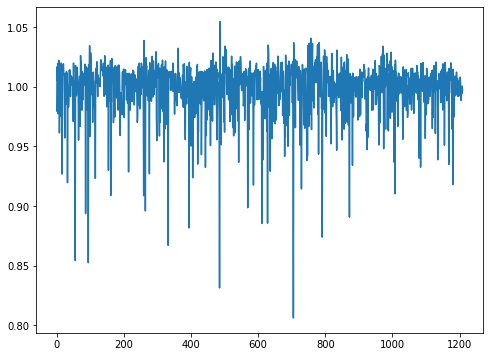

In [ ]:
if target_position_side == 'short':
  target_idx_list = short_idx_list
  np_target_pr = np_short_pr
else:
  target_idx_list = long_idx_list
  np_target_pr = np_long_pr
  
print(len(target_idx_list))
print(len(np_target_pr))

input_data_length = 100

data_x, data_y = [], []
data_idx = []


#         select plot columns       #
basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
# senkoua_list = ['senkou_a1',  'senkou_a2']
# senkoub_list = ['senkou_b1',  'senkou_b2']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4']

# sma_list = ['sma1', 'sma4']
sma_list = ['sma1']


#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
# trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

input_colname = basic_list + senkoua_list + senkoub_list + sar_list + sma_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list + sma_list
outer_price_colname = macd_list + stoch_list + fisher_list + cctbbo_list



#   이곳에서, local / global scaling 을 진행해 data 를 추출해야할 것임    #
for s_pr_i, _i in enumerate(target_idx_list):

  _ep_idx_ = _i[0][0]
  # print("_ep_idx_ :", _ep_idx_)

  if _ep_idx_ < input_data_length:
    continue

  #     you should copy res_df for consistency    #
  temp_x = res_df.iloc[_ep_idx_ - input_data_length:_ep_idx_].copy()
  # temp_x = res_df.iloc[_ep_idx_ - input_data_length:_ep_idx_]
  temp_y = np_target_pr[s_pr_i]

  #   1. temp_x 를 on_price / outer_price 로 나누어 scaling 진행   #
  #   2. 각각에 해당하는 column_name 가져오기     #
  temp_onprice_x = temp_x[price_colname]
  # print(temp_onprice_x)

  # temp_outerprice_x = temp_x[outer_price_colname]
  # print(temp_outerprice_x)

  if np.sum(np.isnan(temp_onprice_x.values)) > 0:
    print("np.sum(np.isnan(temp_onprice_x.values)) > 0")
    continue

  scaled_onprice_x = min_max_scale(temp_onprice_x.values)
  
  # plt.plot(scaled_onprice_x)
  # plt.show()

  #       Todo      #
  #       1. scaled pr      #
  #       1-1. check org y_max / y_min
  # # max_min_fluc = np.max(temp_onprice_x) / np.min(temp_onprice_x)
  # max_min_fluc = max(temp_onprice_x) / min(temp_onprice_x)
  max_min_fluc = np.max(np.max(temp_onprice_x)) / np.min(np.min(temp_onprice_x))
  # max_min_fluc = (temp_onprice_x.max()) / (temp_onprice_x.min())
  # print("max_min_fluc :", max_min_fluc)

  # scaled_y = (1 / max_min_fluc) * temp_y
  scaled_y = (1 / max_min_fluc) * (temp_y - 1) + 1
  # scaled_y = temp_y
  
  # print("temp_y :", temp_y)
  # print("scaled_y :", scaled_y)
  # print()

  data_x.append(scaled_onprice_x)
  data_y.append(scaled_y)
  # data_y.append(temp_y)

  data_idx.append(_ep_idx_)
  
  # break

np_data_x = np.array(data_x)
np_data_y = np.array(data_y)
np_data_idx = np.array(data_idx)
print("np_data_x.shape :", np_data_x.shape)
print("np_data_y.shape :", np_data_y.shape)
print("np_data_idx.shape :", np_data_idx.shape)

# print(test_y)
plt.plot(np_data_y)
plt.show()

#### split data

In [ ]:
tvt_size = len(np_data_x)

re_np_data_x = np.expand_dims(np_data_x, axis=-1)
print("re_np_data_x.shape :", re_np_data_x.shape)
# break

train_x = re_np_data_x[:int(tvt_size * 0.6)]
val_x = re_np_data_x[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_x = re_np_data_x[int(tvt_size * 0.8):]

print("len(train_x) :", len(train_x))
print("len(val_x) :", len(val_x))
print("len(test_x) :", len(test_x))

train_y = np_data_y[:int(tvt_size * 0.6)]
val_y = np_data_y[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_y = np_data_y[int(tvt_size * 0.8):]

train_idx = np_data_idx[:int(tvt_size * 0.6)]
val_idx = np_data_idx[int(tvt_size * 0.6):int(tvt_size * 0.8)]
test_idx = np_data_idx[int(tvt_size * 0.8):]


# ----------- save set ----------- #

ckpt_path = current_path + 'ckpt/'

pair_name = key.split(".")[0].split(" ")[1]
print("pair_name :", pair_name)

# model_name = 'basicv2.0a_prscale_%s_%s.h5' % (pair_name, input_data_length)
model_name = 'basicv2.0a_prlvrgscale_%s_%s_%s.h5' % (target_position_side, pair_name, input_data_length)
print("model_name :", model_name)

# break

re_np_data_x.shape : (1210, 100, 29, 1)
len(train_x) : 726
len(val_x) : 242
len(test_x) : 242
pair_name : ETHUSDT_sartrend_backi2
model_name : basicv2.0a_prlvrgscale_short_ETHUSDT_sartrend_backi2_100.h5


#### define model

In [1]:
# MAX_EPOCHS = 100
# MAX_EPOCHS = 1000
MAX_EPOCHS = 500

patience = MAX_EPOCHS // 5
patience = MAX_EPOCHS // 10
# patience = 2

ckpt_path = current_path + 'ckpt/'

def compile_and_fit(model, model_name, train_flow, val_flow, class_weight=None, patience=patience):

  tf.keras.backend.clear_session()

  checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path + model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='auto')

  # model.compile(loss='categorical_crossentropy', 
  #               optimizer=tf.optimizers.Adam(learning_rate=1e-5, decay=5e-6), 
  #               # optimizer=tf.optimizers.Adam(learning_rate=1e-6, decay=5e-7), 
  #               metrics=['accuracy'])
  
  # model.compile(loss='categorical_crossentropy', 
  # model.compile(loss=tf.losses.SparseCategoricalCrossentropy(), 
  #               optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
  #               metrics=[tf.metrics.Accuracy()])

  model.compile(loss=tf.losses.MeanSquaredError(),
                # optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5),
                optimizer=tf.optimizers.Adam(learning_rate=1e-5, decay=5e-6), 
                # optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
                metrics=[tf.metrics.MeanAbsoluteError()])
  

  history = model.fit(train_flow, epochs=MAX_EPOCHS,
                      validation_data=val_flow,
                      callbacks=[checkpoint, early_stopping],
                      # callbacks=[early_stopping],
                      # class_weight=class_weight
                      )
  return history

NameError: ignored

In [ ]:
def cnn2d_model(input_shape):

    visible = tf.keras.layers.Input(shape=input_shape, name='input')
    
    net = tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', kernel_initializer='he_normal')(visible)
    # net = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal')(visible)
    # net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.BatchNormalization()(net)
    # net = tf.keras.layers.Activation('relu')(net)
    net = tf.keras.layers.LeakyReLU()(net)
    # net = tf.keras.layers.MaxPool2D(pool_size=2)(net)
    # net = tf.keras.layers.AveragePooling2D(padding='same')(net)


    # net = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    net = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.BatchNormalization()(net)
    # net = tf.keras.layers.Activation('relu')(net)
    net = tf.keras.layers.LeakyReLU()(net)
    # net = tf.keras.layers.MaxPool2D(pool_size=2)(net)

    net = tf.keras.layers.Flatten()(net)
    net = tf.keras.layers.Dense(128)(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Dense(64)(net)
    net = tf.keras.layers.LeakyReLU()(net)

    # net = tf.keras.layers.Dense(2, activation='softmax')(net)
    net = tf.keras.layers.Dense(1)(net)

    # create model 
    model = tf.keras.models.Model(inputs=visible, outputs=net)
    # summary layers
    # print(model.summary())
    
    return model

#### train

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator( 
    # rotation_range = 45,
    # zoom_range = 0.5,
    # shear_range = 0.5,
    # horizontal_flip = True,
    # vertical_flip = True,
    # width_shift_range=0.5,
    # height_shift_range=0.5,
    # fill_mode = 'nearest'
    )

valgen = ImageDataGenerator( 
    )

datagen.fit(train_x)
valgen.fit(val_x)
batch_size = 64

train_flow = datagen.flow(train_x, train_y, batch_size=batch_size) 
val_flow = valgen.flow(val_x, val_y, batch_size=batch_size) 

#         train / test      #
model = cnn2d_model(train_x.shape[1:])
history = compile_and_fit(model, model_name, train_flow, val_flow)

#### test

In [ ]:
# const idx 내부에서 test short_idx 의 0 index value 이상의 value 를 찾고 이후의 pr 을 cumprod
for cs_i, c_i in enumerate(const_idx_list):

  const_ep_idx_ = c_i[0][0]
  if const_ep_idx_ >= short_idx_list[-len(test_x):][0][0][0]:
    print("const_ep_idx_ :", const_ep_idx_)
    print("short_idx_list[-len(test_x):][0][0][0] :", short_idx_list[-len(test_x):][0][0][0])
    break

print("const_idx_list[cs_i] :", const_idx_list[cs_i])
baseline_acc_pr = const_np_pr[cs_i:].cumprod()[-1]
print("baseline_acc_pr :", baseline_acc_pr)

const_ep_idx_ : 343353
short_idx_list[-len(test_x):][0][0][0] : 343341
const_idx_list[cs_i] : ([343353], [343375, 343453])
baseline_acc_pr : 0.6211143749540625


(726,)
(242,)
(242,)
test_result.shape : (1210, 1)
target_y.shape : (1210, 1)
y_score.shape : (1210, 1)
acc_pr_bythr : [0.6659680907457509, 0.6659680907457509, 0.6579081785913117, 0.6653401412718627, 0.6653401412718627, 0.6653401412718627, 0.6770369007265483, 0.693347556731453, 0.693347556731453, 0.6840855656156081, 0.6840855656156081, 0.6685588114145292, 0.6685588114145292, 0.6576683819485414, 0.6576683819485414, 0.6576683819485414, 0.6508077709155865, 0.6508077709155865, 0.6448733140309011, 0.6448733140309011, 0.6448733140309011, 0.6335926054825288, 0.636214354509716, 0.6426834019201371, 0.6426834019201371, 0.6728142188475709, 0.6728142188475709, 0.6728142188475709, 0.6645293931375915, 0.6634042056500989, 0.6609359965826426, 0.6551995955072614, 0.6551995955072614, 0.6384958247241617, 0.6313365538889555, 0.6313365538889555, 0.6155596482698312, 0.6144474530825494, 0.6286569590343309, 0.6286569590343309, 0.6195435709498738, 0.6101648308992611, 0.5842446809847764, 0.5753525455995822, 0.5

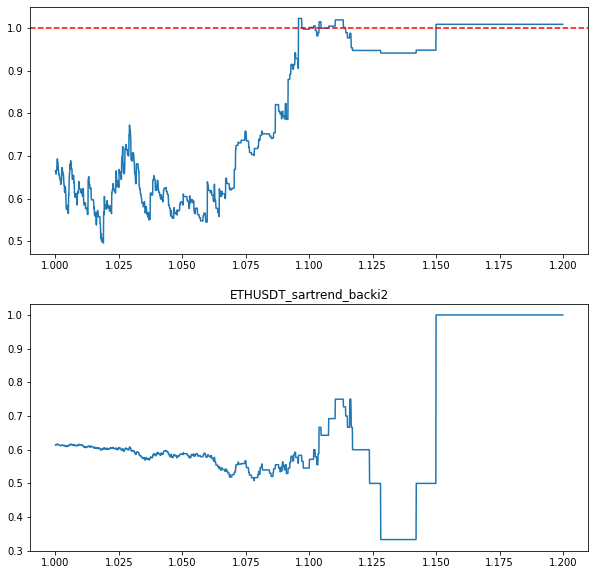

In [ ]:
# model_name = 'basicv2.0a_prscale_%s_%s.h5' % (pair_name, input_data_length)
# model_name = 'basicv2.0a_prlvrgscale_%s_%s.h5' % (pair_name, input_data_length)
model_name = 'basicv2.0a_prlvrgscale_%s_%s_%s.h5' % (target_position_side, pair_name, input_data_length)
model_name = 'basicv2.0a_prlvrgscale_short_ETHUSDT_backi2_100.h5'

model = tf.keras.models.load_model(ckpt_path + model_name)

target_x = np.vstack((train_x, val_x, test_x))
print(train_y.shape)
print(val_y.shape)
print(test_y.shape)
target_y = np.vstack((train_y.reshape(-1, 1), val_y.reshape(-1, 1), test_y.reshape(-1, 1)))

# target_x = train_x
# target_y = train_y

test_result = model.predict(target_x)
print('test_result.shape :', test_result.shape)
# print('pr_val.shape :', pr_val.shape)

y_score = test_result[:, [-1]]
# y_score = test_result[:, [0]]
# print('target_y[:5] :', target_y.reshape(-1,)[:5])
# print('np.unique(target_y) :', np.unique(target_y, return_counts=True))
# print('y_score[:5] :', y_score[:5])
# print('np.unique(y_score) :', np.unique(y_score, return_counts=True))

print('target_y.shape :', target_y.shape)
print('y_score.shape :', y_score.shape)

# from sklearn.metrics import precision_recall_curve

#     precision recall curve   #
# precision, recall, threshold = precision_recall_curve(target_y, y_score)
# precision, recall = precision[:-1], recall[:-1]

# plt.plot(threshold, precision, label='precision')
# plt.plot(threshold, recall, label='recall')
# plt.legend()
# plt.title('precision recall')
# plt.show()
# print(y_pred)


# threshold = [0.65]
# print('threshold :', threshold)
# break

acc_pr_bythr = []
wr_bythr = []
new_thresh = []

threshold = np.arange(1, 1.2, 0.0001)
# threshold = np.arange(0.5, 1, 0.0001)

for thresh in threshold:
  
  # if thresh < 0.5:
  #     continue

  y_pred = np.where(y_score[:, -1] > thresh, 1, 0)
  # print('y_pred.shape :', y_pred.shape)
  # print('y_pred :', y_pred)

  #     compare precision     #

  # print('precision :', precision_score(target_y, y_pred))
  # print('recall :', recall_score(target_y, y_pred))
  # print()

  # print('np.isnan(np.sum(x_test)) :', np.isnan(np.sum(x_test)))
  # print('np.isnan(np.sum(target_y)) :', np.isnan(np.sum(target_y)))

  # # plot_confusion_matrix(best_model, x_test, target_y, normalize=None)
  # # plt.show()  
  # print()

  # from sklearn.metrics import confusion_matrix

  # #     check win-ratio improvement     #
  # cmat = confusion_matrix(target_y, y_pred)
  # # print(cmat)
  # # print(np.sum(cmat, axis=1))
  

  # org_wr = np.sum(cmat, axis=1)[-1] / sum(np.sum(cmat, axis=1))
  # ml_wr = cmat[1][1] / np.sum(cmat, axis=0)[-1]
  # print('win ratio improvement %.2f --> %.2f' % (org_wr, ml_wr))

  test_size = len(target_y)
  test_pr_list = target_y
  # print('origin ac_pr :', np.cumprod(test_pr_list)[-1])

  # print('pr_test.shape :', pr_test.shape)

  # print(y_pred)
  # print(test_pr_list)

  pred_pr_list = np.where(y_pred == 1, test_pr_list.reshape(-1, ), 1)
  # print("pred_pr_list[:10] :", pred_pr_list[:10])

  #       after fee adjustment    #
  # pred_pr_list = (pred_pr_list - 1 - fee) * lvrg + 1

  # pred_pr_list = np.where(np.isnan(pred_pr_list), 1.0, pred_pr_list)
  # pred_pr_list = np.where(pred_pr_list == 0.0, 1.0, pred_pr_list)
  # print('pred_pr_list.shape :', pred_pr_list.shape)

  # if np.cumprod(test_pr_list)[-1] < np.cumprod(pred_pr_list)[-1]:
  #   print('accum_pr increased ! : %.3f --> %.3f' % (np.cumprod(test_pr_list)[-1], np.cumprod(pred_pr_list)[-1]))
  #   print('thresh :', thresh)
    
  # if len(threshold) == 1:
#   plt.figure(figsize=(10, 5))
#   plt.subplot(121)
#   plt.plot(np.cumprod(test_pr_list))
#   plt.title('%.3f' % (np.cumprod(test_pr_list)[-1]))
# # plt.show()

#   plt.subplot(122)
#   plt.plot(np.cumprod(pred_pr_list))
#   plt.title('%.3f' % (np.cumprod(pred_pr_list)[-1]))
#   # plt.axvline(len(org_pr_test), linestyle='--', color='r')
#   plt.show()
  try:
    wr = len(pred_pr_list[pred_pr_list > 1]) / len(pred_pr_list[pred_pr_list != 1])
  except:
    # pass
    wr_bythr.append(np.nan)
  else:
    wr_bythr.append(wr)

  acc_pr_bythr.append(np.cumprod(pred_pr_list)[-1])
  new_thresh.append(thresh)


print('acc_pr_bythr :', acc_pr_bythr)

plt.figure(figsize=(10, 10))
# plt.subplot(121)
# plt.plot(threshold, precision, label='precision')
# plt.plot(threshold, recall, label='recall')
# plt.legend()
# plt.title('precision recall')
# plt.show()


plt.subplot(211)
plt.plot(new_thresh, acc_pr_bythr)
plt.axhline(1, linestyle='--', color='r')
# plt.axhline(np.cumprod(test_pr_list)[-1], linestyle='--', color='r')
try:
  plt.axhline(baseline_acc_pr, linestyle='--', color='b')
except Exception as e:
  print(e)

plt.subplot(212)
plt.plot(new_thresh[-len(wr_bythr):], wr_bythr)

plt.title(pair_name)
plt.show()


### nontp survey

##### term & liqd

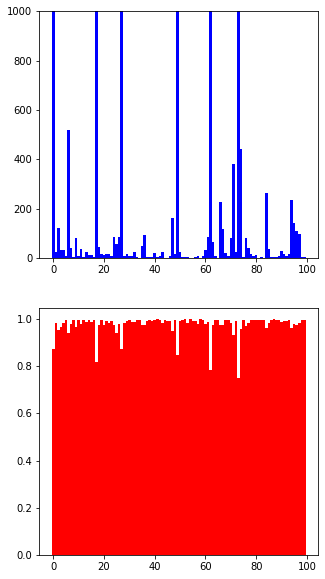

In [ ]:
# print(nontp_long_indexs)

plot_size = 100

for s_i in range(plot_size, len(trade_list), plot_size):

  slice_trade_list = trade_list[s_i - plot_size:s_i]
  slice_liqd_list = liqd_list[s_i - plot_size:s_i]

  # print(len(slice_trade_list))
  np_trade = np.array(slice_trade_list)
  trade_term = np_trade[:, [2]] - np_trade[:, [1]]

  plt.figure(figsize=(5, 10))
  plt.subplot(211)
  plt.bar(np.arange(len(trade_term)), trade_term.reshape(-1,), width=1, color='b')

  # plt.plot(trade_term.reshape(-1,))
  plt.ylim(0, 1000)
  # plt.show()
  # print()

  plt.subplot(212)
  # print(len(liqd_list))
  # plt.bar(np.arange(len(liqd_list)), liqd_list)
  plt.bar(np.arange(len(slice_liqd_list)), np.array(slice_liqd_list), width=1, color='r')
  # plt.plot(slice_liqd_list)
  plt.show()

print()

##### check nontp index

In [ ]:
# np_nontp_short_indexs = np.array(nontp_short_indexs)
# np_nontp_long_indexs = np.array(nontp_long_indexs)

# short_til_term = len(res_df) - np_nontp_short_indexs
# long_til_term = len(res_df) - np_nontp_long_indexs

max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

print(max_nontp_long_term)

32747


# traded section plot

## plot with off-color st with dash

### plot all indicator (stepline ver.)

In [ ]:
save_plot = False

if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".xlsx", "")
  try:
    os.mkdir(plot_check_dir)
  except:
    pass

prev_plotsize = 100
post_plotsize = 20

# inversion = True
inversion = False

# hedge = True
# hedge = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1',  'senkou_a2']
senkoub_list = ['senkou_b1',  'senkou_b2']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4']

# sma_list = ['sma1', 'sma4']
sma_list = ['sma1']


#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + sma_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + sma_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list + sma_list
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


# ------------------- ml set ------------------- #
plot_thresh = 1.034

thresh_idx = test_idx[y_score[:, -1] > plot_thresh]

# for t_i, (initial_i, i, j) in enumerate(trade_list):
for t_i, (ep_idx_list_, tp_idx_list_) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # ------------- check ml plot ------------- #
  # print("ep_idx_list_ :", ep_idx_list_)
  # break
  if ep_idx_list_[0] not in thresh_idx:
    continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > short_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
    # continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize, input_cols]
  plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_short_ep = short_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_ep = long_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_short_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_long_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # ---------------------- sma ---------------------- #
  alpha = 1
  for sm_i, sma in enumerate(sma_list):
    if sm_i > 0:
      lw = 5
    else:
      lw = 2
    plt.plot(plot_df[sma].values, alpha=alpha, color='black', linewidth=lw)
    alpha -= 0.2
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize - (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')


  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  if not static_lvrg:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\nlvrg : %s" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], lvrg_list[t_i]))
  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i]))

  print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')





  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


In [ ]:
# print()
for item in os.listdir(current_path + "plot_check/"):
  if item.endswith('png'):
    os.remove(current_path + "plot_check/" + item)
    print(current_path + "plot_check/" + item, "removed !")

### plot nontp case

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

# hedge = True
# hedge = False

short_ver = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
# basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

# sar_cols = [15, 18] # 15 ~ 19
# ichimoku_cols = [20, 21]  # 20 ~ 29
# # ichimoku_cols = [22, 23]  # 20 ~ 29
# ichimoku_cols2 = [22, 23]  # 20 ~ 29
# macd_cols = [30]  # 30 ~ 34

# print(res_df.columns[basic_cols])
# break

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list 
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


if short_ver:
  nontp_indexs = nontp_short_indexs
  nontp_liqd_list = nontp_short_liqd_list
  nontp_pr_list = nontp_short_pr_list
  nontp_ep = nontp_short_ep_list
else:
  nontp_indexs = nontp_long_indexs
  nontp_liqd_list = nontp_long_liqd_list
  nontp_pr_list = nontp_long_pr_list
  nontp_ep = nontp_long_ep_list


for t_i, i in enumerate(nontp_indexs):

  j = len(res_df) - 1

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > upper_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + 1][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- indicator part ---------------------- #
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  if i != initial_i:
    plt.axvline(prev_plotsize - (i - initial_i), alpha=0.5, linestyle='--')
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(nontp_ep[t_i], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  # for sub_i in range(len(ep_tp_list[t_i][1])):
  #   plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline    

  #         hedge ep & tp         #
  # h_i = h_trade_list[t_i][1]
  # if h_i is not None:
  #   plt.axvline(prev_plotsize + (h_i - i), linestyle='--')
  #   plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
  #   plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  plt.title("%s ~ %s -> liqd : %.2f\npr : %.2f" % (i, j, nontp_liqd_list[t_i], nontp_pr_list[t_i]))

  #           y lim         #
  plt.ylim(y_min, y_max)


  # #           macd          #
  # # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(313)
  plt.subplot(gs[1])
  alpha = 1
  for stoch in stoch_list:
    plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(50, linestyle='--')
  plt.axhline(stoch_upper, linestyle='--')
  plt.axhline(stoch_lower, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


Output hidden; open in https://colab.research.google.com to view.

### specific plot v1

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

if inversion:
  plot_pr_list = rev_np_pr
else:
  plot_pr_list = np_pr



#         select plot columns       #
basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

sar_cols = [15, 18] # 15 ~ 19
ichimoku_cols = [20, 21]  # 20 ~ 29
# ichimoku_cols = [22, 23]  # 20 ~ 29
ichimoku_cols2 = [22, 23]  # 20 ~ 29
macd_cols = [30]  # 30 ~ 34


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']

input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i != 257:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue


  if plot_pr_list[t_i] > 1.0:
  # if plot_pr_list[t_i] < 1.0:
    continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  fig = plt.figure(figsize=(12, 16))
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  ax = fig.add_subplot(211)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle
  
  plt.plot(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.plot(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  # plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.plot(plot_upper_middle.values, alpha=1, linestyle='--')  # middle
  plt.plot(plot_lower_middle.values, alpha=1, linestyle='--')  # middle

  plt.plot(plot_short_tp.values, alpha=1, linestyle=':')  # tp
  plt.plot(plot_long_tp.values, alpha=1, linestyle=':')  # tp

  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14], # ichimoku
                    where=plot_df.values[:, 13] >= plot_df.values[:, 14], facecolor='g', alpha=0.5) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 13], plot_df.values[:, 14],
                    where=plot_df.values[:, 13] <= plot_df.values[:, 14], facecolor='r', alpha=0.5)  
  
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17], # ichimoku
                    where=plot_df.values[:, 16] >= plot_df.values[:, 17], facecolor='g', alpha=0.3) # ichimoku
  plt.fill_between(np.arange(len(plot_df)), plot_df.values[:, 16], plot_df.values[:, 17],
                    where=plot_df.values[:, 16] <= plot_df.values[:, 17], facecolor='r', alpha=0.3)

  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(ep_tp_list[t_i][1], linestyle='-')  # tp line axhline
  plt.title("%s ~ %s -> %.5f\n %s" % (i, j, plot_pr_list[t_i], tp_state_list[t_i]))


  plt.subplot(212)
  plt.plot(plot_df.values[:, [15]], 'g', alpha=1)  # middle
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(0, linestyle='--')

  plt.show()
  # plt.draw()
  plt.close()
  print()



KeyError: ignored

### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


## none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()